# logistic regression


In [363]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# load the data from the file
df = pd.read_csv("PhishingDataSet.csv")

df.drop(df.columns[[0, 3, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]], axis = 1, inplace = True) 

# X = feature values, all the columns except the last column
X = df.iloc[:, :-1]

# y = target values, last column of the data frame
Y = df.iloc[:, -1]

seed = 6


In [364]:
df['Result'].replace(-1, 0 , inplace=True)

In [365]:
df[:15]

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,SSLfinal_State,HTTPS_token,SFH,Result
0,-1,1,1,-1,-1,-1,-1,-1,0
1,1,1,1,1,-1,1,-1,-1,0
2,1,0,1,1,-1,-1,-1,-1,0
3,1,0,1,1,-1,-1,-1,-1,0
4,1,0,1,1,-1,1,1,-1,1
5,-1,0,1,-1,-1,1,-1,-1,1
6,1,0,1,1,-1,-1,1,-1,0
7,1,0,1,1,-1,-1,-1,-1,0
8,1,0,1,1,-1,1,-1,-1,1
9,1,1,1,1,-1,1,1,-1,0


In [366]:
df.shape

(11055, 9)

In [367]:
# df.drop(df.columns[[0, 3, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]], axis = 1, inplace = True) 

In [368]:
for col in df.columns: 
    print(col)

having_IPhaving_IP_Address
URLURL_Length
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
SSLfinal_State
HTTPS_token
SFH
Result


In [369]:
df.shape

(11055, 9)

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [372]:
X_train.head()

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,SSLfinal_State,HTTPS_token,SFH
1010,1,-1,1,1,-1,1,1,-1
7741,-1,-1,1,1,-1,0,1,-1
2517,1,-1,1,1,-1,-1,1,-1
3563,1,-1,1,1,-1,-1,1,-1
8305,-1,-1,1,1,-1,1,1,-1


In [373]:
X_test.head()

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,SSLfinal_State,HTTPS_token,SFH
3989,1,-1,1,1,-1,0,1,-1
4001,1,1,1,1,-1,1,1,1
8961,1,-1,1,1,1,1,1,1
466,1,-1,1,1,-1,-1,1,-1
7040,-1,1,1,1,-1,-1,1,-1


In [374]:
from sklearn.linear_model import LogisticRegression 

In [375]:
model = LogisticRegression()

# model.fit(X_train, y_train)

In [376]:
# param_grid = [
#     {'penalty' : ['l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag', 'saga'],
#     'max_iter' : [100, 1000, 2500, 5000]
#     }
# ]

In [377]:
# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# best_clf = clf.fit(X_train,y_train)

In [378]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [379]:
best_clf.score(X_train,y_train)

0.8871551334237902

In [380]:
y_score = best_clf.decision_function(X_test)

In [393]:
from sklearn.metrics import average_precision_score
y_score = best_clf.predict(X_test)

average_precisionSVM = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


In [382]:
model.fit(X_train, y_train)
pred1 = model.predict(X_test)

/Users/yasseen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [383]:
model.score(X_test,y_test)

0.8837630031659882

In [384]:
model.predict_proba(X_test)

array([[6.46392541e-01, 3.53607459e-01],
       [6.54420911e-02, 9.34557909e-01],
       [8.35782284e-05, 9.99916422e-01],
       ...,
       [9.62176052e-01, 3.78239485e-02],
       [9.43726144e-01, 5.62738558e-02],
       [1.51567767e-04, 9.99848432e-01]])

# Naive bayes

FItting the model and getting accuracy

In [385]:
from sklearn.naive_bayes import GaussianNB

In [386]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
pred2 = gnb.predict(X_test)

In [353]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred2))

Accuracy: 0.5626413387607417


In [389]:
from sklearn.metrics import average_precision_score
y_score = gnb.predict(X_test)

average_precisionSVM = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.87


# KNN

In [390]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# grid_params = {
#     'n_neighbors':[3,5,11,19],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

# gs_results = gs.fit(X_train, y_train)

In [391]:
# gs_results.best_estimator_

In [392]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

knn.score(X_train,y_train)

from sklearn.metrics import average_precision_score
y_score = knn.predict(X_test)

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

#Predict the response for test dataset
pred3 = knn.predict(X_test)



# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, pred3))

Average precision-recall score: 0.86


# Random forest

In [357]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()



In [358]:
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }


In [359]:
# CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 5)


In [360]:
model.fit(X_train, y_train)
pred4 = model.predict(X_test)

/Users/yasseen/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [361]:
model.score(X_test,y_test)

0.9045680687471732

In [329]:
from sklearn.metrics import average_precision_score
y_score = model.predict(X_test)

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


# SVM

In [394]:
from sklearn.svm import SVC

In [395]:
model = SVC()

model.fit(X_train, y_train)

/Users/yasseen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [396]:
# clf1 = GridSearchCV(estimator=SVC(),
#              param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

# clf1.fit(X_train,y_train)

# clf1.score(X_test,y_test)

In [401]:
pred5 = model.predict(X_test)

In [402]:
model.score(X_test,y_test)

0.8973315241971959

In [403]:
from sklearn.metrics import average_precision_score
y_score = model.decision_function(X_test)

average_precisionSVM = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


In [400]:
# from sklearn import model_selection

# all_models = []
# all_models.append(('LR', LogisticRegression()))
# all_models.append(('RF', RandomForestClassifier()))
# all_models.append(('SVM', SVC()))
# all_models.append(('KNN', KNeighborsClassifier()))
# all_models.append(('NB', GaussianNB()))
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, all_models in all_models:
# 	kfold = model_selection.KFold(n_splits=10, random_state=seed)
# 	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

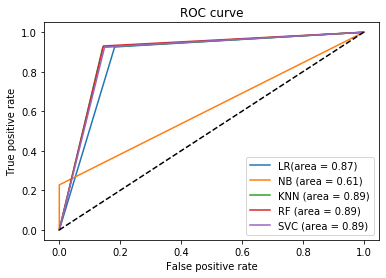

In [198]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, threshold1 = roc_curve(y_test, pred1)
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2)
fpr3, tpr3, threshold3 = roc_curve(y_test, pred3)
fpr4, tpr4, threshold4 = roc_curve(y_test, pred4)
fpr5, tpr5, threshold5 = roc_curve(y_test, pred5)

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)
auc5 = auc(fpr5, tpr5)

plt.plot(fpr1,tpr1, label='LR(area = %0.2f)' % (auc1))
plt.plot(fpr2,tpr2, label='NB (area = %0.2f)' % (auc2))
plt.plot(fpr3,tpr3, label='KNN (area = %0.2f)' % (auc3))
plt.plot(fpr4,tpr4, label='RF (area = %0.2f)' % (auc4))
plt.plot(fpr5,tpr5, label='SVC (area = %0.2f)' % (auc5))


plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

plt.show()

Text(0.5, 1, 'L R')

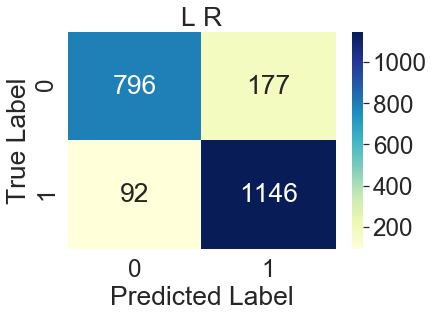

In [222]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.metrics import confusion_matrix

matrix3 = confusion_matrix(y_test, pred1)
sn.set(font_scale=2.2)
sn.heatmap(matrix3,annot=True,cmap="YlGnBu",fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.autoscale(enable=True, axis='y')
plt.title('L R')

In [248]:
%history -n -o 12

  12:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
pred2 = gnb.predict(X_test)
